##                 Small Image classification using Convolution Neural Networks.

In [ ]:
In this project,we use Convolution Neural Networks to classify the images by using CIFAR10 dataset.

## Import all the required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
y_train.shape


(50000, 1)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

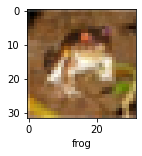

In [10]:
plot_sample(X_train, y_train, 0)


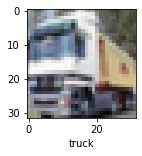

In [11]:
plot_sample(X_train, y_train, 1)


In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.8118 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.6259 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5434 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4842 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4344 - accuracy: 0.4945


In [14]:
ann.fit(X_test, y_test, epochs=5)


Epoch 1/5
313/313 [==============================] - 22s 70ms/step - loss: 1.4593 - accuracy: 0.4768
Epoch 2/5
313/313 [==============================] - 22s 71ms/step - loss: 1.4149 - accuracy: 0.5023
Epoch 3/5
313/313 [==============================] - 22s 70ms/step - loss: 1.3822 - accuracy: 0.5123
Epoch 4/5
313/313 [==============================] - 22s 69ms/step - loss: 1.3582 - accuracy: 0.5208
Epoch 5/5
313/313 [==============================] - 23s 74ms/step - loss: 1.3257 - accuracy: 0.5361


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.75      0.51      1000
           1       0.51      0.82      0.63      1000
           2       0.56      0.16      0.25      1000
           3       0.49      0.29      0.37      1000
           4       0.45      0.56      0.50      1000
           5       0.58      0.35      0.44      1000
           6       0.65      0.51      0.57      1000
           7       0.66      0.54      0.59      1000
           8       0.59      0.69      0.64      1000
           9       0.59      0.58      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.55      0.52      0.51     10000
weighted avg       0.55      0.52      0.51     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4510 - accuracy: 0.4802
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1157 - accuracy: 0.6108
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9926 - accuracy: 0.6539
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9151 - accuracy: 0.6800
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8436 - accuracy: 0.7076


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.9399 - accuracy: 0.6770


[0.9399421811103821, 0.6769999861717224]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.0954032e-03, 1.8203943e-03, 3.5780050e-02, 6.8358248e-01,
        8.6547770e-03, 1.9578966e-01, 1.5732773e-02, 5.2841776e-04,
        4.9119782e-02, 8.9626410e-04],
       [4.3325063e-02, 1.1188336e-01, 2.3468101e-05, 1.5767423e-06,
        1.7561907e-06, 2.7479331e-07, 2.7245278e-06, 1.5839818e-07,
        8.3861727e-01, 6.1443285e-03],
       [2.0489607e-02, 9.5881835e-02, 1.1316991e-03, 1.4992692e-03,
        1.1907388e-03, 7.2745688e-04, 3.6646286e-04, 5.5222504e-04,
        8.0781037e-01, 7.0350386e-02],
       [5.7722312e-01, 6.8199329e-02, 1.3955614e-02, 1.9622757e-03,
        1.8198896e-02, 1.5443240e-04, 6.0773804e-04, 1.1858891e-04,
        3.1832942e-01, 1.2505542e-03],
       [1.2710259e-06, 4.6156154e-05, 2.2721826e-03, 1.2275650e-02,
        8.1170684e-01, 6.0833180e-03, 1.6751716e-01, 3.9730323e-05,
        4.9151389e-05, 8.5168695e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

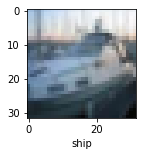

In [23]:
plot_sample(X_test, y_test,2)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.84      0.74      0.79      1000
           2       0.65      0.43      0.52      1000
           3       0.54      0.44      0.49      1000
           4       0.54      0.70      0.61      1000
           5       0.60      0.55      0.57      1000
           6       0.71      0.77      0.74      1000
           7       0.74      0.74      0.74      1000
           8       0.74      0.82      0.78      1000
           9       0.70      0.84      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

